This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [17]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#import dataset
df = pd.read_csv('mushrooms.csv')

In [19]:
#first five row
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
df.shape

(8124, 23)

Dataset contain 8124 rows and 23 columns

In [21]:
#Check the null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

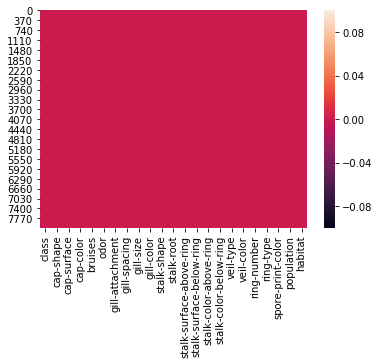

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [24]:
#check the target
df['class'].unique()

array(['p', 'e'], dtype=object)

Target value contain values of 'p' and 'e'

In [25]:
df['population'].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

# EDA

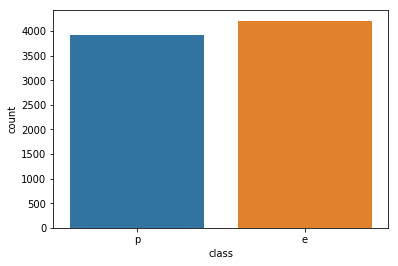

In [28]:
sns.countplot(x="class",data=df)
plt.show()

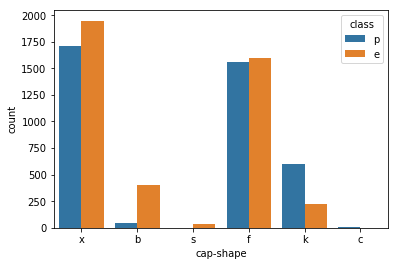

In [31]:
sns.countplot(x='cap-shape',hue='class',data=df)

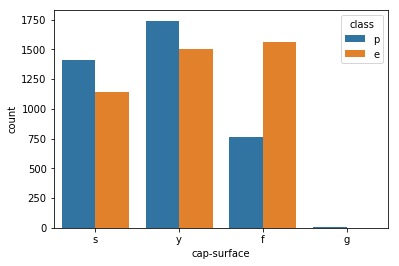

In [32]:
sns.countplot(x='cap-surface',hue='class',data=df)

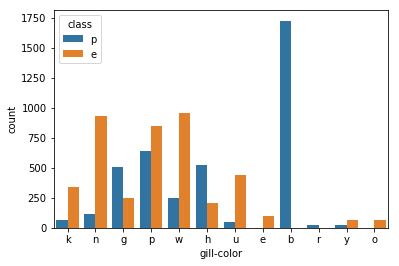

In [33]:
sns.countplot(x='gill-color',hue='class',data=df)

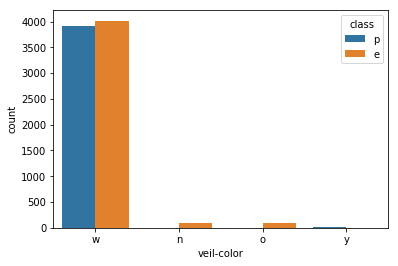

In [34]:
sns.countplot(x='veil-color',hue='class',data=df)

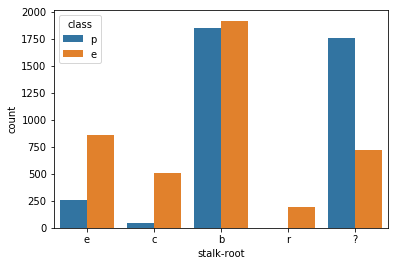

In [36]:
sns.countplot(x='stalk-root',hue='class',data=df)

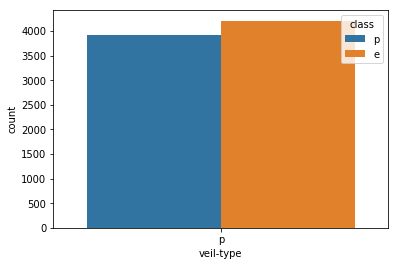

In [37]:
sns.countplot(x='veil-type',hue='class',data=df)

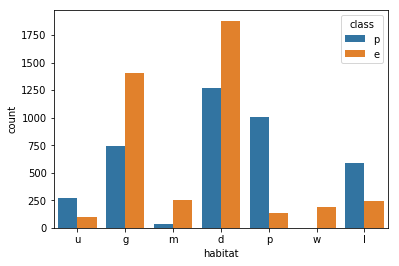

In [38]:
sns.countplot(x='habitat',hue='class',data=df)

In [39]:
#lets divide data in x and y
x=df.iloc[:,1:23]
y=df['class']

In [40]:
#Convert string to int
x=pd.get_dummies(x,drop_first=True)


In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)


In [43]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [65]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [66]:

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1.0
random state

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42,test_size=0.20,stratify=y)
y_pred=lg_clf.predict(x_test)


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [76]:
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))
print("classification_report: \n",classification_report(y_test,y_pred))
print("roc_auc_score: \n",roc_auc_score(y_test,y_pred))

confusion_matrix: 
 [[842   0]
 [  0 783]]
classification_report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       842
          1       1.00      1.00      1.00       783

avg / total       1.00      1.00      1.00      1625

roc_auc_score: 
 1.0


In [ ]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(lg_clf, 'mushroom_dataset.pkl')   